<h1 align="center"><b>Data Management and Analysis Unit 2 - Using <code>R</code></b></h1>

---

## $\rightarrow$ Table of contents

[2) Managing Data](#2-managing-data)
 - [2.1) Data Frames](#21-data-frames)
 - [2.2) Random Values](#22-random-values)
 - [2.3) Functions](#23-functions)
 - [2.4) Histograms more in detail](#24-histograms-more-in-detail)

---

## 2) Managing Data

When dealing with datasets, most of the time there could be a lot of noise in such dataset. How can we discover them? We can compare our dataset with a random dataset. For instance, suppose the following problem:

> We have, in a Data Management course, 7 students that passed the exam: their grades are the following:
> $$ x \; = \; \begin{bmatrix} 26 & 28 & 22 & 23 & 18 & 31 & 30 \end{bmatrix}$$
>
> The mean of the grades is $\overline{x} \; = \; 25,4$, while the standard deviation is equal to $\sigma \; = \; 4,68$

In [1]:
x <- c(26, 28, 22, 23, 18, 31, 30)

mean(x)     # Mean of x
sd(x)       # Standard Deviation of x

[1] 25.42857

[1] 4.685337

---

### 2.1) Data Frames

We previously saw in the first part that a dataset, such as `iris`, is a table collecting various data. Most of dataframes are included in the `datasets` package, but we can also create our owns. For instance, we can create one from a matrix: we can do it with the `data.frame()` function

In [6]:
ident <- matrix(c(1, 0, 0, 0, 1, 0, 0, 0, 1), ncol = 3)
dframe <- data.frame(ident)

dframe
class(dframe)   # Check that dframe is an actual dataframe

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,0,0
0,1,0
0,0,1


[1] "data.frame"

We can also establish the names of the three columns by assigning to `names(name_of_dataframe)` a collection of names:

In [4]:
names(dframe) <- c("Val1", "Val2", "Val3")

dframe

Val1,Val2,Val3
<dbl>,<dbl>,<dbl>
1,0,0
0,1,0
0,0,1


---

### 2.2) Random Values

In `R` we can set a seed for all the random numbers generated with the `set.seed()` function. With that seed, all the random numbers generated by `R` will be the same. The `rnorm()` function generates a normal distribution with random values.
> ```R
> rnorm(samples, mean = x, sd = s)
> ```
> where:
>  - `samples` is the number of samples in the distribution;
>  - `mean = x` is the mean that we want to give to our distribution;
>  - `sd = s` is the standard deviation that we want to give to our distribution.

In [24]:
heigth <- rnorm(10, mean = 170, sd = 20)
weight <- rnorm(10, mean = 150, sd = 20)

heigth
weight

[1] 157.8704 208.5981 155.3726 185.4153 186.8051 147.7921 173.4484 191.4553
 [9] 132.1759 156.6359

[1] 188.6645 143.6529 171.3917 142.8728 119.0970 170.6447 197.9995 171.9169
 [9] 148.8700 126.9410

For practical purpouses, we can also round up all the digits:

In [29]:
heigth_round <- round(heigth, 2)
weight_round <- round(weight, 2)

heigth_round
weight_round

[1] 157.87 208.60 155.37 185.42 186.81 147.79 173.45 191.46 132.18 156.64

[1] 188.66 143.65 171.39 142.87 119.10 170.64 198.00 171.92 148.87 126.94

Let's create a new data frame, called `hw`, which will record the heights and the weights of some people.

In [31]:
hw <- data.frame(height = heigth_round, weight = weight_round)

Let's try to see the structure of our dataset

In [34]:
head(hw)

,height,weight
,<dbl>,<dbl>
1,157.87,188.66
2,208.60,143.65
3,155.37,171.39
4,185.42,142.87
5,186.81,119.10
6,147.79,170.64


As per tables, we can access to the columns of a dataframe with the `dataframe$column` syntax:

In [35]:
hw$height

[1] 157.87 208.60 155.37 185.42 186.81 147.79 173.45 191.46 132.18 156.64

---

### 2.3) Functions

In `R` is possible to create some functions. The syntax is the following:
```R
function_name <- function(args) {
    # Insert the instructions here
}
```

Just like in `Rust`, the last called element is the one that gets returned. Consider for instance the following example:

In [36]:
f <- function(arg) {
    arg + 1
}

f("1")

ERROR: Error in arg + 1: argomento non numerico passato ad un operatore binario


Notice the error: you can't pass a string to an operator made for numerical values. It's important to respect the type of data that a function uses.

---

### 2.4) Histograms more in detail

When dealing with datasets, it might be helpful to draw histograms. We know that histograms are made with the `hist()` function. For instance, let's try to make the histogram of the `iris$Sepal.Length` variable:

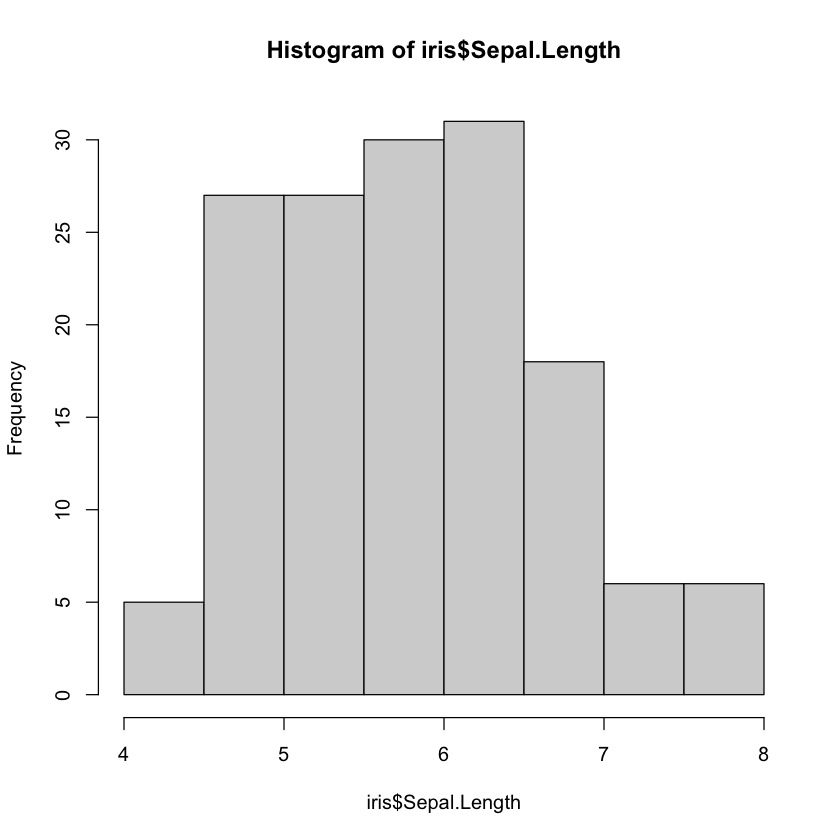

In [37]:
histogram <- hist(iris$Sepal.Length)

We can get some text information of the histogram by using the `str()` function, which is very similar to the `.toString()` `Java` method

In [38]:
str(histogram)

List of 6
 $ breaks  : num [1:9] 4 4.5 5 5.5 6 6.5 7 7.5 8
 $ counts  : int [1:8] 5 27 27 30 31 18 6 6
 $ density : num [1:8] 0.0667 0.36 0.36 0.4 0.4133 ...
 $ mids    : num [1:8] 4.25 4.75 5.25 5.75 6.25 6.75 7.25 7.75
 $ xname   : chr "iris$Sepal.Length"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


Of course, if we try to see the class of the histogram, we get that the type is `histogram`:

In [39]:
class(histogram)

[1] "histogram"

The histogram can be seen as a discrete function (so a function which has well-defined extremes of integration) that is based on the probability density function. By itself, the probability density function is an improper integral, which has the shape of a Gaussian distribution.

The function `lm()` allows to describe a given function, and in this case we'll test it with `iris$Sepal.Length~iris$Sepal.Width`, so the function that describes the variable `iris$Sepal.Width` in function of the variable `iris$Sepal.Lenght` (readily, "*does the width variate with respect to the length?*").

In [42]:
fn <- lm(iris$Sepal.Length~iris$Sepal.Width)
str(fn)

List of 12
 $ coefficients : Named num [1:2] 6.526 -0.223
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "iris$Sepal.Width"
 $ residuals    : Named num [1:150] -0.644 -0.956 -1.111 -1.234 -0.722 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ effects      : Named num [1:150] -71.566 -1.188 -1.081 -1.187 -0.759 ...
  ..- attr(*, "names")= chr [1:150] "(Intercept)" "iris$Sepal.Width" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:150] 5.74 5.86 5.81 5.83 5.72 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:150, 1:2] -12.2474 0.0816 0.0816 0.0816 0.0816 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "iris$Sepal.Width"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.08 1.02
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr 

That's a big output. Let's try to get a summary out of it:

In [43]:
summary(fn)


Call:
lm(formula = iris$Sepal.Length ~ iris$Sepal.Width)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5561 -0.6333 -0.1120  0.5579  2.2226 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.5262     0.4789   13.63   <2e-16 ***
iris$Sepal.Width  -0.2234     0.1551   -1.44    0.152    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8251 on 148 degrees of freedom
Multiple R-squared:  0.01382,	Adjusted R-squared:  0.007159 
F-statistic: 2.074 on 1 and 148 DF,  p-value: 0.1519


We can also plot our results:

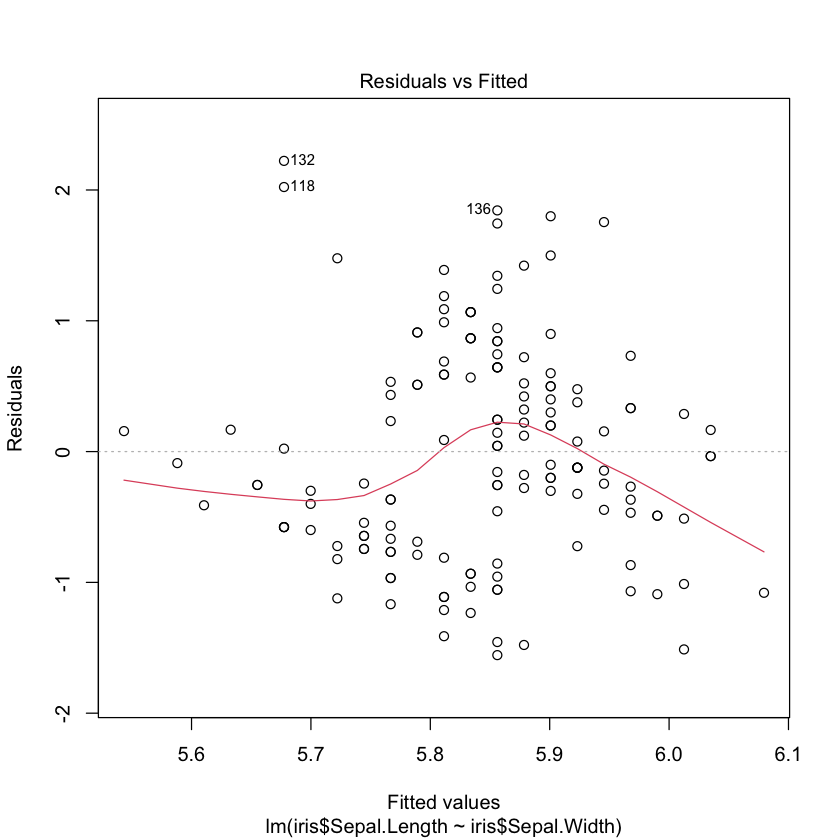

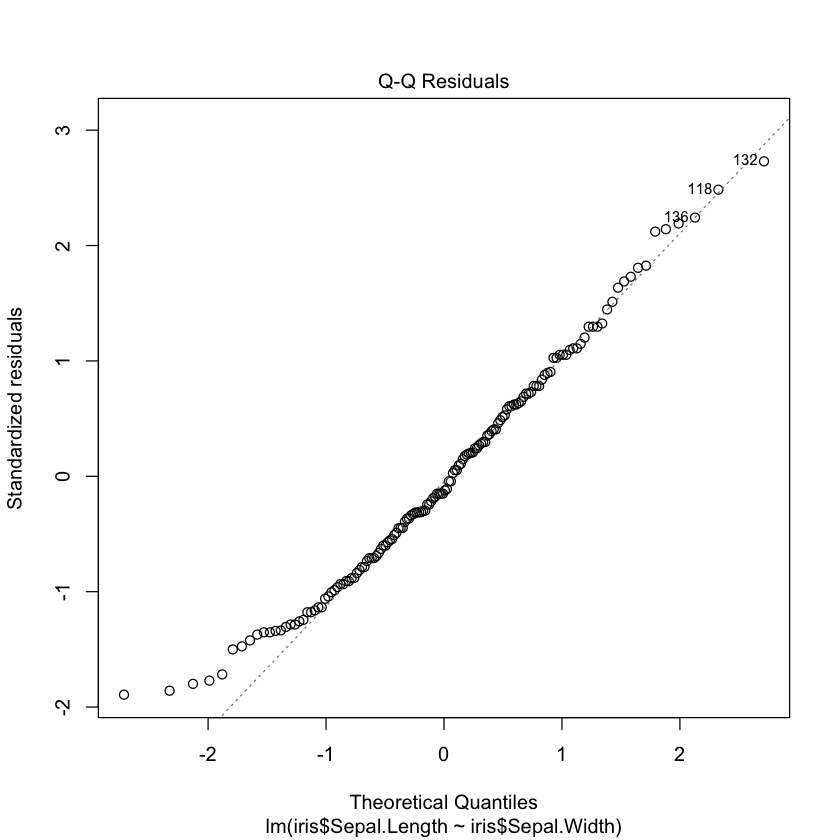

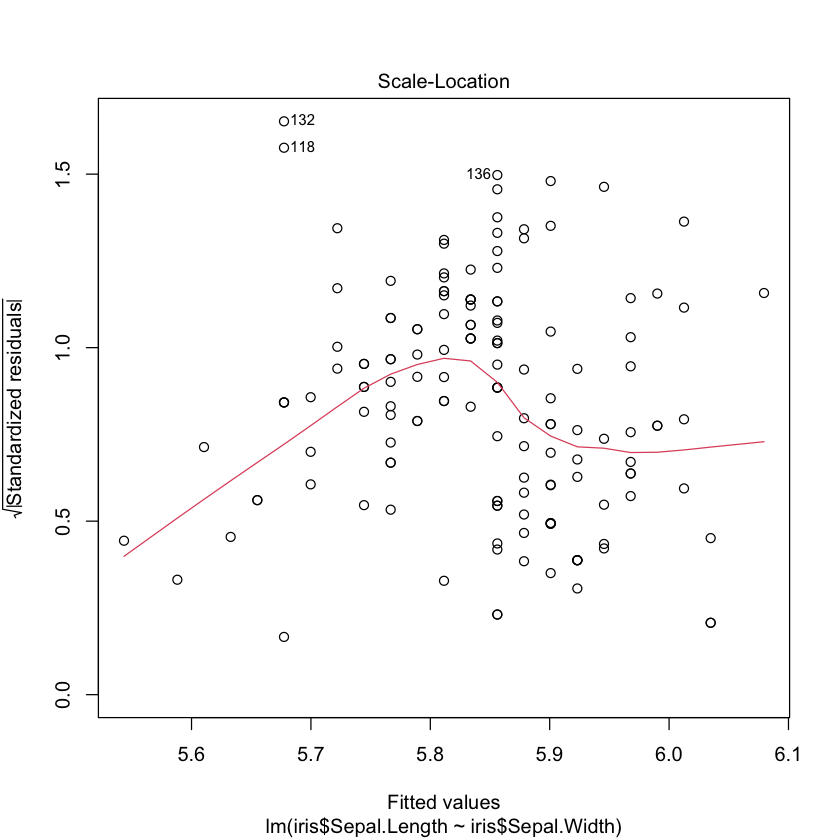

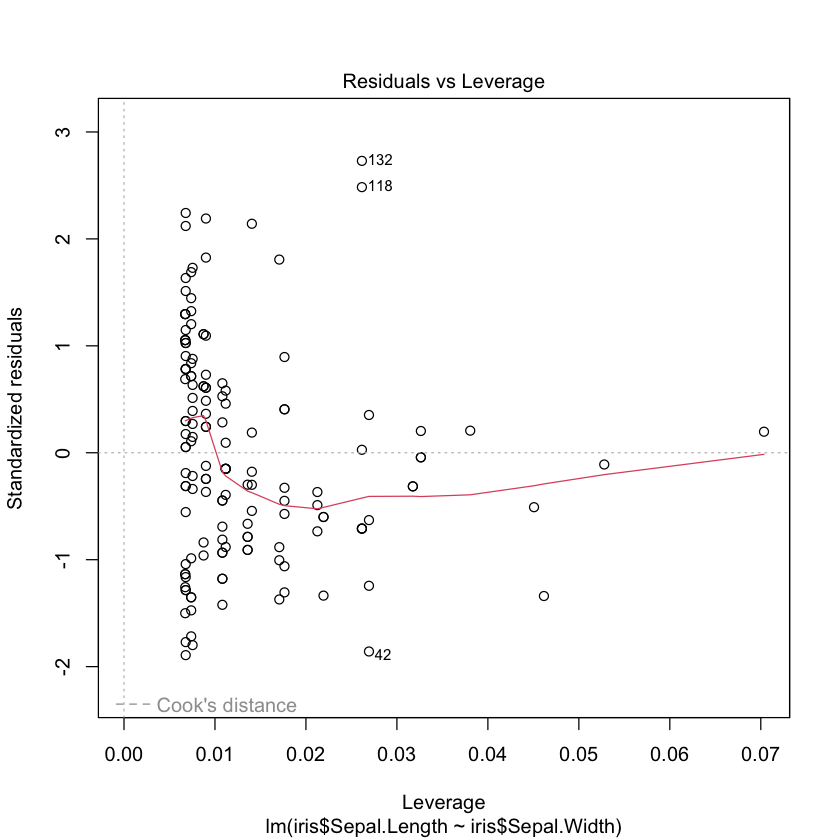

In [44]:
plot(fn)

In the `01_beginning.ipynb` file, in section `1.2`, we ran the command `plot(iris)`, and such command made the following plot:

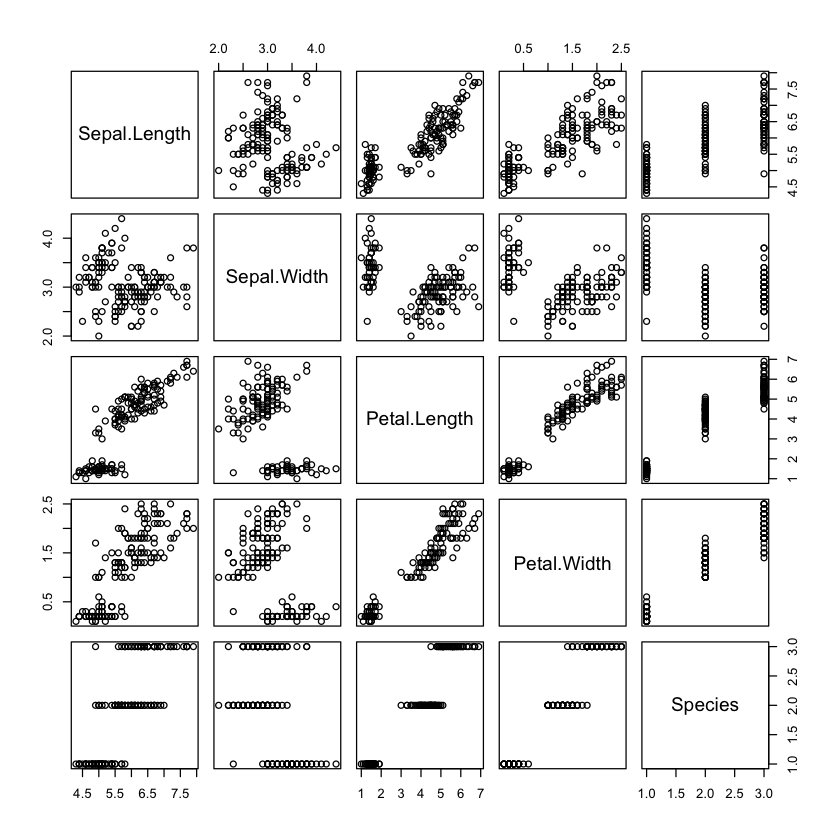

In [45]:
plot(iris)

Such plot compares all the dimensions of the dataset. Be careful with this command, because on a large dataset it might take a lot of computational power and time.

---

### 2.5) Linear Regression

The concept of **linear regression** is the one of modelling (continue)